## Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

    R&D Spend -- Research and devolop spend in the past few years.
    Administration -- spend on administration in the past few years.
    Marketing -- spend on Marketing in the past few years.
    State -- states from which data is collected.
    Profit  -- profit of each state in the past few years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\Multiple Linear Regression\50_Startups.csv")
df = df.drop(columns='State')
df = df.rename(columns={'R&D Spend':'R_D','Marketing Spend':'Marketing'})
df

,R_D,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [3]:
df.isna().sum()

R_D               0
Administration    0
Marketing         0
Profit            0
dtype: int64

In [4]:
df.describe()

,R_D,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data visualisation

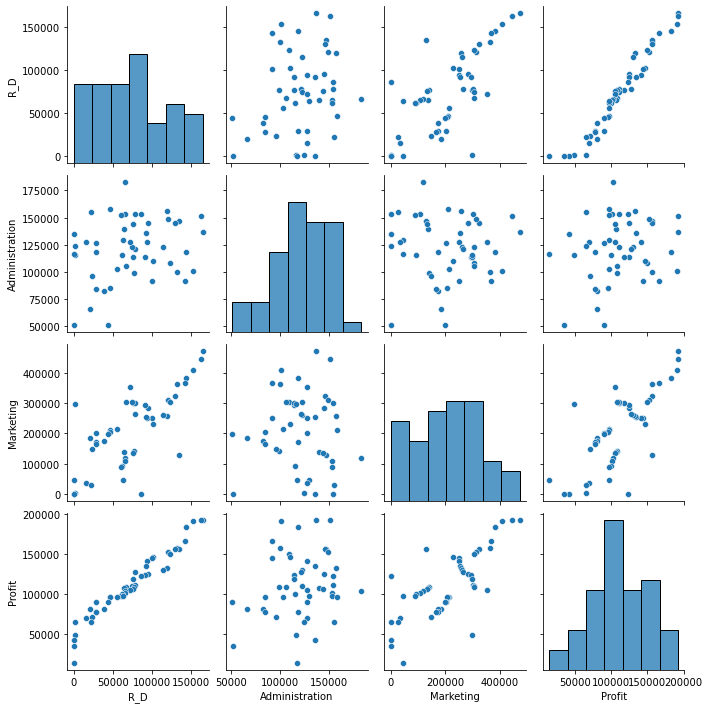

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,R_D,Administration,Marketing,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

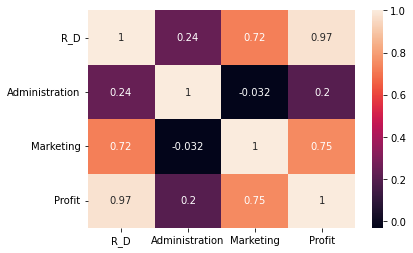

In [7]:
sns.heatmap(df.corr(), annot= True)

## Model Building

In [8]:
model = smf.ols('Profit~R_D+Administration+Marketing', data= df).fit()

In [9]:
model.params

Intercept         50122.192990
R_D                   0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        23:38:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Simple Linear Regession Models

In [11]:
# Profit-R_D Model
model1 = smf.ols('Profit~R_D', data= df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           3.50e-32
Time:                        23:38:58   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_D            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Profit-Administration Model
model2 = smf.ols('Profit~Administration', data= df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 17 Jan 2023   Prob (F-statistic):              0.162
Time:                        23:38:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Profit-Marketing Model
model3 = smf.ols('Profit~Marketing', data= df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.38e-10
Time:                        23:38:58   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Profit-Administration & Marketing Model
model4 = smf.ols('Profit~Administration+Marketing', data= df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.50e-10
Time:                        23:38:58   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model5 = smf.ols('Profit~Administration+R_D', data= df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.29e-31
Time:                        23:38:58   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
R_D                0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model6 = smf.ols('Profit~Marketing+R_D', data= df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        23:38:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF

In [17]:
df.columns

Index(['R_D', 'Administration', 'Marketing', 'Profit'], dtype='object')

In [18]:
r_R_D = smf.ols('R_D~Administration+Marketing', data= df).fit().rsquared
v_R_D = 1/(1- r_R_D)

r_Administration = smf.ols('Administration~R_D+Marketing', data= df).fit().rsquared
v_Administration = 1/(1- r_Administration)

r_Marketing = smf.ols('Marketing~R_D+Administration', data= df).fit().rsquared
v_Marketing = 1/(1- r_Marketing)

In [19]:
data = pd.DataFrame({
    'Features' : ['R_D', 'Administration', 'Marketing'],
    'VIF' : [v_R_D, v_Administration, v_Marketing]
})
data

,Features,VIF
0,R_D,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [20]:
df = df.drop(columns=['Administration'])
df

,R_D,Marketing,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [21]:
final_model = smf.ols('Profit~R_D+Marketing', data= df).fit()

In [22]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        23:38:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prediction for new data

In [23]:
newdata = pd.DataFrame({
    'R_D' : [60000,120000,180000],
    'Marketing' : [10000,235000,470000]
})
newdata

,R_D,Marketing
0,60000,10000
1,120000,235000
2,180000,470000


In [24]:
newdata['Profit'] = final_model.predict(newdata)
newdata

,R_D,Marketing,Profit
0,60000,10000,95069.985616
1,120000,235000,149594.300181
2,180000,470000,204417.693498


In [26]:
R_table = pd.DataFrame({
    'Model Name' : ['model', 'model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'final model'],
    
    'Model Info' : ['R&D, Administration, Marketing, Profit', 'R&D, Profit', 'Administration, Profit',
                    'Marketing, Profit', 'Administration, Marketing, Profit', 'R&D, Administration, Profit', 
                    'R&D, Marketing, Profit', 'R&D, Marketing, Profit' ],
    
    'Model R^2 value' : [model.rsquared, model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared,
                         model5.rsquared, model6.rsquared, final_model.rsquared]
})
R_table

,Model Name,Model Info,Model R^2 value
0,model,"R&D, Administration, Marketing, Profit",0.950746
1,model 1,"R&D, Profit",0.946535
2,model 2,"Administration, Profit",0.040287
3,model 3,"Marketing, Profit",0.559154
4,model 4,"Administration, Marketing, Profit",0.609723
5,model 5,"R&D, Administration, Profit",0.947813
6,model 6,"R&D, Marketing, Profit",0.950450
7,final model,"R&D, Marketing, Profit",0.950450
